In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_set = pd.read_csv('Covid_data_MLR.csv')
x = data_set.iloc[ : , :-1].values
y = data_set.iloc[ : , -1 ].values

In [3]:
print(x)

[[10 'Moderate' 0 97]
 [80 'High' 0 92]
 [10 'Low' 0 97]
 [81 'High' 4 75]
 [12 'Moderate' 0 97]
 [18 'Low' 0 66]
 [13 'Moderate' 0 93]
 [94 'High' 4 64]
 [86 'High' 2 76]
 [20 'Moderate' 0 92]
 [15 'Moderate' 0 94]
 [15 'Moderate' 0 92]
 [16 'Low' 0 92]
 [17 'Moderate' 0 93]
 [18 'Moderate' 0 93]
 [19 'Moderate' 0 92]
 [19 'Moderate' 0 89]
 [12 'Moderate' 0 97]
 [20 'Moderate' 0 93]
 [24 'Moderate' 0 92]
 [25 'Moderate' 0 93]
 [59 'High' 2 68]
 [63 'High' 1 66]
 [25 'Moderate' 1 62]
 [26 'High' 0 94]
 [26 'Low' 0 97]
 [28 'Moderate' 0 99]
 [59 'High' 0 69]
 [28 'Moderate' 0 89]
 [29 'Moderate' 0 93]
 [48 'Moderate' 0 93]
 [30 'Moderate' 0 62]
 [30 'Moderate' 0 86]
 [32 'Moderate' 0 84]
 [34 'Moderate' 1 90]
 [35 'Moderate' 0 89]
 [50 'High' 2 77]
 [56 'High' 2 76]
 [56 'High' 1 77]
 [36 'High' 1 90]
 [38 'High' 2 75]
 [40 'Moderate' 0 90]
 [40 'High' 0 92]
 [61 'High' 2 76]
 [42 'High' 0 92]
 [46 'High' 0 91]
 [49 'Moderate' 0 80]
 [52 'High' 1 80]
 [32 'Moderate' 0 89]
 [53 'High' 1 

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[1])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [17]:
print(x)

[[1.0 0.0 0.0 1.0 10 0 97]
 [1.0 0.0 1.0 0.0 80 0 92]
 [0.0 1.0 0.0 0.0 10 0 97]
 [1.0 0.0 1.0 0.0 81 4 75]
 [1.0 0.0 0.0 1.0 12 0 97]
 [0.0 1.0 0.0 0.0 18 0 66]
 [1.0 0.0 0.0 1.0 13 0 93]
 [1.0 0.0 1.0 0.0 94 4 64]
 [1.0 0.0 1.0 0.0 86 2 76]
 [1.0 0.0 0.0 1.0 20 0 92]
 [1.0 0.0 0.0 1.0 15 0 94]
 [1.0 0.0 0.0 1.0 15 0 92]
 [0.0 1.0 0.0 0.0 16 0 92]
 [1.0 0.0 0.0 1.0 17 0 93]
 [1.0 0.0 0.0 1.0 18 0 93]
 [1.0 0.0 0.0 1.0 19 0 92]
 [1.0 0.0 0.0 1.0 19 0 89]
 [1.0 0.0 0.0 1.0 12 0 97]
 [1.0 0.0 0.0 1.0 20 0 93]
 [1.0 0.0 0.0 1.0 24 0 92]
 [1.0 0.0 0.0 1.0 25 0 93]
 [1.0 0.0 1.0 0.0 59 2 68]
 [1.0 0.0 1.0 0.0 63 1 66]
 [1.0 0.0 0.0 1.0 25 1 62]
 [1.0 0.0 1.0 0.0 26 0 94]
 [0.0 1.0 0.0 0.0 26 0 97]
 [1.0 0.0 0.0 1.0 28 0 99]
 [1.0 0.0 1.0 0.0 59 0 69]
 [1.0 0.0 0.0 1.0 28 0 89]
 [1.0 0.0 0.0 1.0 29 0 93]
 [1.0 0.0 0.0 1.0 48 0 93]
 [1.0 0.0 0.0 1.0 30 0 62]
 [1.0 0.0 0.0 1.0 30 0 86]
 [1.0 0.0 0.0 1.0 32 0 84]
 [1.0 0.0 0.0 1.0 34 1 90]
 [1.0 0.0 0.0 1.0 35 0 89]
 [1.0 0.0 1.0 0.0 50 2 77]
 

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x , y , test_size = .2 , random_state = 42 )

### Training the Model

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Predicting the test set results

In [43]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision = 3)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[ 60533.335  59994.   ]
 [106619.446 127181.   ]
 [ 62772.09   50104.   ]
 [105434.518 110911.   ]
 [ 62980.887  62019.   ]
 [ 99354.489  97101.   ]
 [102651.887 101000.   ]
 [ 89229.203  90015.   ]
 [ 82388.277  84008.   ]
 [104969.026 100000.   ]
 [ 83042.367  75012.   ]
 [ 99019.408  98101.   ]
 [103836.814 112101.   ]
 [ 95072.015  99110.   ]]


### Visualization

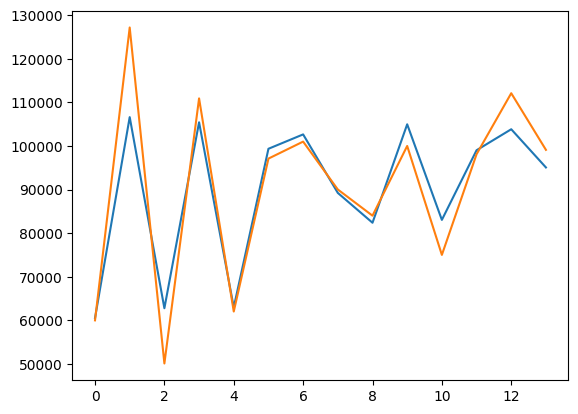

In [49]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show()